# Natural Channels 

Simulation in natural channels is a straightforward extension of the previous concepts, with added complications of arbitrary geometry, and possibly transient flow (Chapter 8)

Below the essential features of both natural channel simulation and unsteady flow are discussed - the focus is on the mapping from real conditions into the computer.

## Finite-Difference Method for Unsteady Open Channel Flow

Recall early in the class we derived the linked continunity and momentum equations called the St. Venant equations.  Solving the St. Venant Equations is accomplished by mapping the physical system and the set of partial differential equations into an algebraic structure that a computer can  manipulate.   Finite-difference,  finite-element,  finite-volume,  and  marker-in-cell are the typical methods.  

The simplest form of solution that is conditionally stable and reasonably straightforward to program is called the Lax-Diffusion scheme.  This  scheme  is  reasonably  accurate  and  useful  for  practical  problems  as  well  as  to learn what goes on under the hood of a professional tool like SWMM or HEC-RAS.

### Governing Difference Equations -- Lax Scheme

The finite-difference analysis converts the two PDEs into an algebraic update struc-ture and maps boundary conditions onto a computational domain.  The two PDEs are continuity and momentum.  As a quick refresher:

The continuity equation for a computational cell (reach) is 

$$
\begin{equation}
\frac{\partial y}{\partial t} = -\frac{A}{B}\frac{\partial V}{\partial x}-V\frac{\partial y}{\partial x}
\end{equation}
$$

### Continunity
$A$ is the depth-area function (a function of x and y). 
$B$ is the depth-topwidth function (a function of x and y). 
The Lax scheme uses spatial averaging to represent the $A$, $B$, and $V$ terms that appear as coefficients on the partial derivatives on the right-hand side of the equation. 
The time derivative is accomplished with a conventional forward-in-time first order finite difference model, and the spatial derivatives are conventional first-order centered differences. Both these differencing schemes are prestented shortly.

### Momentum
The momentum equation is
$$
\begin{equation}
\frac{\partial V}{\partial t} = g(S_0-S_f)-V\frac{\partial V}{\partial x}-g\frac{\partial y}{\partial x}
\end{equation}
$$

and also uses spatial averages for the coefficients on the spatial derivatives in the right hand side of the equation as well as spatial averages for the friction and topographic slopes. 

Friction slope can be recovered using any resistance model, Chezy-Manning's is typical.

### Mapping from the Physical to Computational Domain

The next important step is to map the physical world to the computer world.

![](stream-schematic.png)

The figure above is a plan view of a stream that is to be modeled. The stream has some width, depth, and path.  Flow in figure is from left to right.
The dashed line in the figure is the thalweg and is the pathline of the stream.  Distances in the computational model are along this path.  The conventional orientation is "looking downstream." So when the cross sections are stationed the distances in a cross section are usually referenced as distanced from the left bank, looking downstream.

The figure below is a schematic that depicts the relationship of left-bank, cross section, elevations, and such -- all referenced to the concept of "looking downstream."

![](stream-section-schematic.png)

The figure below is a schematic of the next step of mapping into the computational domain. 

![](stream-discritize.png)

In the figure the stream is divided into cells called reaches (or cells, depends on context and author). The centroid of the reach is called the node, and most of the arithmetic is written with the understanding that all properties of the reach are somehow "averaged" and these averages are assigned to these nodes.  Adjacent nodes are connected (in the computer) by links (which represent conduits between nodes). The continuity and momentum equations collectively describe the node average behavior (such as depth) and link behavior (such as momentum flux).

The next figure is a schematic of three adjacent nodes that is used to develop the difference equations.

![](stream-node-scheme.png)

In the figure both the velocities and depths are mapped to the node (Lax-Diffusion scheme), but other schemes map the velocities to the interfaces. Again this decision affects the differencing scheme; the differencing scheme chooses the location. A kind of chicken and egg situation. 

At this point the mapping has **abstracted** considerably from the physical world and the computer world loses the sense of
sinuosity. In this development, we will assume the reach lengths are all the same value, the velocities are all parallel to the local thalweg and perpendicular to the cross sections, and the depth is measured from the channel bottom. The differencing scheme then replaces the continuity and momentum PDEs with update equations to map the water surface position and mean section velocity at the nodes to different moments in time. The updating is called time-stepping.

### Building the Difference Equations 
  
The partial derivatives are replaced with difference quotients that approximate their behavior.  
The mapping in some sense influences the resulting difference scheme. 

### Time Differences

A first-order time difference is 

$$
\begin{equation}
\frac{\partial y}{\partial t}~\approx~\frac{y_i^{t+\Delta t}-y_i^t}{\Delta t}
\end{equation}
$$

Lax replaced the known time-level term with its spatial average from adjacent cells.
For the depth;

$$
\begin{equation}
\frac{\partial y}{\partial t}~\approx~\frac{y_i^{t+\Delta t}-\frac{1}{2}(y_{i-1}^t+y_{i+1}^t)}{\Delta t}
\end{equation}
$$

Similarly for mean section velocity

$$
\begin{equation}
\frac{\partial V}{\partial t}~\approx~\frac{V_i^{t+\Delta t}-\frac{1}{2}(V_{i-1}^t+V_{i+1}^t)}{\Delta t}
\end{equation}
$$

### Space Differences  

Lax used centered differences for the spatial derivatives

$$
\begin{equation}
\frac{\partial y}{\partial x}~\approx~\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}
\end{equation}
$$

$$
\begin{equation}
\frac{\partial V}{\partial x}~\approx~\frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}
\end{equation}
$$

Lax also used spatial averages for the depth-area and slope functions

$$
\begin{equation}
\frac{1}{2}(\frac{A}{B}\vert_{i-1}^t + \frac{A}{B}\vert_{i+1}^t)
\end{equation}
$$

$$
\begin{equation}
\frac{1}{2}(S_{f,i-1}^t + S_{f,i+1}^t)
\end{equation}
$$

These difference formulations are substituted into continunity and momentum and then rearranged to isolate the terms at the $t+\Delta t$ time level.

### Continunity  

Starting with the PDE,

$$
\begin{equation}
\frac{\partial y}{\partial t} = -\frac{A}{B}\frac{\partial V}{\partial x}-V\frac{\partial y}{\partial x}
\end{equation}
$$

first replace the time derivative

$$
\begin{equation}
\frac{y_i^{t+\Delta t}-\frac{1}{2}(y_{i-1}^t+y_{i+1}^t}{\Delta t} = -\frac{A}{B}\frac{\partial V}{\partial x}-V\frac{\partial y}{\partial x}
\end{equation}
$$

then replace the space derivatives

$$
\begin{equation}
\frac{y_i^{t+\Delta t}-\frac{1}{2}(y_{i-1}^t+y_{i+1}^t}{\Delta t} = -\frac{A}{B}\frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}-V\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}
\end{equation}
$$

then the spatial averages for the remaining terms.

$$
\begin{equation}
\begin{matrix}
\frac{y_i^{t+\Delta t}-\frac{1}{2}(y_{i-1}^t+y_{i+1}^t)}{\Delta t} = -\frac{1}{2}(\frac{A}{B}\vert_{i-1}^t + \frac{A}{B}\vert_{i+1}^t)\frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}-\frac{1}{2}(V_{f,i-1}^t + V_{f,i+1}^t)\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}\\
~\\
 \end{matrix}
\end{equation}
$$

Next multiply by $\Delta t$

$$
\begin{equation}
\begin{matrix}
y_i^{t+\Delta t}-\frac{1}{2}(y_{i-1}^t+y_{i+1}^t) = -\Delta t\frac{1}{2}(\frac{A}{B}\vert_{i-1}^t + \frac{A}{B}\vert_{i+1}^t)\frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}-\Delta t \frac{1}{2}(V_{f,i-1}^t + V_{f,i+1}^t)\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}\\
~\\
 \end{matrix}
\end{equation}
$$

Move the time level $t$ term to the right hand side

$$
\begin{equation}
\begin{matrix}
y_i^{t+\Delta t} = \frac{1}{2}(y_{i-1}^t+y_{i+1}^t) -\Delta t\frac{1}{2}(\frac{A}{B}\vert_{i-1}^t + \frac{A}{B}\vert_{i+1}^t)\frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}-\Delta t \frac{1}{2}(V_{f,i-1}^t + V_{f,i+1}^t)\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}\\
~\\
 \end{matrix}
\end{equation}
$$

Rename the constant  $\frac{\Delta t}{2 \Delta x} = r$ and simplify

$$
\begin{equation}
\begin{matrix}
y_i^{t+\Delta t} = \frac{1}{2}(y_{i-1}^t+y_{i+1}^t) -\frac{r}{2}(\frac{A}{B}\vert_{i-1}^t + \frac{A}{B}\vert_{i+1}^t)(V_{i+1}^{t}-V_{i-1}^t)-\frac{r}{2}(V_{f,i-1}^t + V_{f,i+1}^t)(y_{i+1}^{t}-y_{i-1}^t) \\
~\\
 \end{matrix}
 \label{eqn:lax-continunity}
\end{equation}
$$


### Momentum 

Again, starting with the PDE, make the time substitution

$$
\begin{equation}
\frac{V_i^{t+\Delta t}-\frac{1}{2}(V_{i-1}^t+V_{i+1}^t)}{\Delta t} = g(S_0-S_f)-V\frac{\partial V}{\partial x}-g\frac{\partial y}{\partial x}
\end{equation}
$$

next the space derivatives

$$
\begin{equation}
\begin{matrix}
\frac{V_i^{t+\Delta t}-\frac{1}{2}(V_{i-1}^t+V_{i+1}^t)}{\Delta t} = g(S_0-S_f)-V\frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}-g\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}\\
~\\
\end{matrix}
\end{equation}
$$

then the spatial averages (If the channel slope is changing, then this would be subjected to a spatial averaging scheme too!)

$$
\begin{equation}
\begin{matrix}
\frac{V_i^{t+\Delta t}-\frac{1}{2}(V_{i-1}^t+V_{i+1}^t)}{\Delta t} = 
g(S_0-\frac{1}{2}(S_{f,i-1}^t + S_{f,i+1}^t))
-\frac{1}{2}(V_{i-1}^t+V_{i+1}^t) \frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}
-g\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}\\
~\\
\end{matrix}
\end{equation}
$$

Multiply by $\Delta t$

$$
\begin{equation}
\begin{matrix}
V_i^{t+\Delta t}-\frac{1}{2}(V_{i-1}^t+V_{i+1}^t)= 
\Delta t  g(S_0-\frac{1}{2}(S_{f,i-1}^t + S_{f,i+1}^t))
-\Delta t  \frac{1}{2}(V_{i-1}^t+V_{i+1}^t) \frac{V_{i+1}^{t}-V_{i-1}^t}{2\Delta x}
-\Delta t  g\frac{y_{i+1}^{t}-y_{i-1}^t}{2\Delta x}\\
~\\
\end{matrix}
\end{equation}
$$

Rename the constant  $\frac{\Delta t}{2 \Delta x} = r$ and isolate the $t + \Delta t$ term

$$
\begin{equation}
\begin{matrix}
V_i^{t+\Delta t}=\frac{1}{2}(V_{i-1}^t+V_{i+1}^t) +
\Delta t  g(S_0-\frac{1}{2}(S_{f,i-1}^t + S_{f,i+1}^t))
- \frac{r}{2}(V_{i-1}^t+V_{i+1}^t) (V_{i+1}^{t}-V_{i-1}^t)
-rg(y_{i+1}^{t}-y_{i-1}^t)\\
~\\
\end{matrix}
\label{eqn:lax-momentum}
\end{equation}
$$

The pair of update equations are the interior point update equations.

The figure below depicts the updating information transfer including:
- Relation of the linked reaches to solution of the equations in the XT-plane. 
- Explicit updating (as used herein) uses the three values at the known time level to project (update) the unknown value at the next time level. 
- Boundary behavior is a separate calculation, dependent on the evolution of the interior solution

![](space-time-map.png) 

At each cell the three known values of a variable ($y$ or $V$) are projected to the next time line as depicted in the figure.

Boundary conditions are the next challenge. These are usually handled using a characteristic equation approach (unless the boundaries are really simple).  For the time being we will use pretty simple boundary conditions, and complicate as necessary.

### Example 1: Steady Flow over a Weir


The backwater curve situation for a rectangular channel with discharge over a weir is repeated.  The channel width is 5 meters, bottom slope $0.001$, Manning's $n=0.02$ and discharge $Q=55.4 \frac{m^3}{sec}$.

We will build a transient solver, although this problem is a steady flow case that we can check with an independent tool (Hamming's approach above).  We will start with the flow depth artificially large and observe that the transient solver will eventually produce an *equilibrium* solution that is more or less the same as the steady-flow solver.  

Generally such a simulation is a good idea to test a new algorithm -- it should be stable enough to converge to and maintain a steady solution.

Why we would consider a transient solver is to examine cases such as that depicted in the photograph below

![](tidal-bore.png)





### Building a Tool

The script is comprised of several parts, and eventually for the sake of taking advantage of the ability to read and operate on files, the script will have several "libraries" that are read by a main control program.  

The main program controls the overall solution process, while the library functions can be built and tested in advance.  What follows is a port from an old FORTRAN and later R program that is specific to this problem, we will get it working first, then generalize for reuse.



In [87]:
import math

In [98]:
# hydraulic functions 
# depth == flow depth          
# bottom == bottom width of trapezoidal channel
# side == side slope (same value both sides) of trapezoidal channel
# computed values:
# bt == computed topwidth :: ar == flow area, used in fd update :: wp == wetted perimeter, used in fd update

def bt(depth,bottom,side):   # depth-topwidth function
    topwidth = (bottom + 2.0*side*depth);
    return(topwidth);

def ar(depth,bottom,side):  # depth area function
    area = (depth*(bottom+side*depth));
    return(area)

def wp(depth,bottom,side):   # depth perimeter
    import math
    perimeter = (bottom+2.0*depth*math.sqrt(1.0+side*side));
    return(perimeter)

In [108]:
###### Problem Constants #######
# these are constants that define the problem
# change for different problems
# a good habit is to assign constants to names so the
# program is readable by people in a few years
g = 9.81 # gravitational acceleration, obviously SI units
n = 10 # number of reaches
q0 = 55.4 # initial discharge
yd = 8.000 # initial flow depth in the model
yu = 5.000 # upstream constant depth
mn = 0.020 # Manning's n
b0 = 5 # bottom width
s0 = 0.001 # longitudinal slope (along direction of flow)
s  = 0.0 # side slope (passed to calls to hydraulic variables)
l  = 11380.0 # total length (the length of computational domain)
tmax = 7000 # total simulation time in seconds
iprt =  31 # print every iprt time steps
nn = n+1 # how many nodes, will jack with boundaries later
mn2 = mn*mn # Manning's n squared, will appear a lot.
a = ar(yd,b0,s) # flow area at beginning of time
v0 = q0/a # initial velocity

In [109]:
######## Here we build storage vectors ###############
y = [0]*nn # create nn elements of vector y, all zero
yp = [0]*nn # updates go in this vector, same length as y
v = [0]*nn # create nn elements of vector v
vp = [0]*nn # updates go in this vector, same length and v
b = [0]*nn
ytmp = [0]*nn
vtmp = [0]*nn
y = [float(yd) for i in y] # populate y with nn things, each thing has value yd
v = [float(v0) for i in y] # populate v with nn things, each thing has value v0

In [110]:
b = bt(y[0],b0,s) # topwidth at downstream end
c = math.sqrt(g*a/b) # celerity at initial conditions
dx = l/n # delta x, length of a reach
#dx

In [111]:
xx = [dx*(i) for i in range(0,nn)] # Spatial locations of nodes, used for plotting

In [112]:
bse = [12 - s0*xx[i] for i in range(0,nn)] # bottom channel elevation
wse = [bse[i]+y[i] for i in range(0,nn)] # water surface elevation
dt = dx/(v0 + c) # the time step that satisfies the courant condtions
kmax = round(tmax/dt)  # set maximum number of time steps

In [113]:
bse

[12.0,
 10.862,
 9.724,
 8.586,
 7.4479999999999995,
 6.31,
 5.172,
 4.034,
 2.895999999999999,
 1.7579999999999991,
 0.6199999999999992]

In [114]:
print('Celerity = ',round(c,3) )
print('Delta x  = ',round(dx,3))
print('Delta t  = ',round(dt,3))
print("ITmax = ",(kmax))

Celerity =  8.859
Delta x  =  1138.0
Delta t  =  111.091
ITmax =  63


The next set of functions are prototype functions for reporting the output -- it will be cleaner to build the output functions separate from the control program, and send the necessary vectors when we want to actually print results.

In [115]:
# display functions 
import matplotlib

def writenow(t,dt,y,v,b0,s): # printing functions
    print("__________")
    print("Time = ",round(t,3)," seconds.","Time step length = ",round(dt,3)," seconds ")
    print("IROW "," DEPTH "," VELOCITY ")
    for irow in range(0,len(v)):
        print(irow,round(y[irow],3),round(v[irow],3))
    return()  #observe a NULL return, this function messages to the output device, so there is nothing to return.

def plot2lines(list1,list2,list3,list4,strx,stry,strtitle): # plot list1 on x, list2 on y, xlabel, ylabel, title
    from matplotlib import pyplot as plt # import the plotting library from matplotlibplt.show()
    plt.plot( list1, list2, color ='brown', marker ='*', linestyle ='solid') # create a line chart, years on x-axis, gdp on y-axis
    plt.plot( list3, list4, color ='blue', marker ='o', linestyle ='solid') # create a line chart, years on x-axis, gdp on y-axis
    plt.title(strtitle)# add a title
    plt.ylabel(stry)# add a label to the x and y-axes
    plt.xlabel(strx)
    plt.show() # display the plot
    return #null return

__________
Time =  0.0  seconds. Time step length =  111.091  seconds 
IROW   DEPTH   VELOCITY 
0 8.0 1.385
1 8.0 1.385
2 8.0 1.385
3 8.0 1.385
4 8.0 1.385
5 8.0 1.385
6 8.0 1.385
7 8.0 1.385
8 8.0 1.385
9 8.0 1.385
10 8.0 1.385
__________
Time =  3261.431  seconds. Time step length =  108.903  seconds 
IROW   DEPTH   VELOCITY 
0 5.0 2.082
1 5.102 2.103
2 5.248 2.081
3 5.435 2.053
4 5.655 2.023
5 5.935 1.984
6 6.254 1.939
7 6.649 1.887
8 7.087 1.814
9 7.637 1.795
10 8.0 1.385
__________
Time =  6649.498  seconds. Time step length =  109.419  seconds 
IROW   DEPTH   VELOCITY 
0 5.0 2.097
1 5.091 2.117
2 5.227 2.094
3 5.398 2.066
4 5.613 2.032
5 5.879 1.989
6 6.203 1.936
7 6.593 1.876
8 7.046 1.799
9 7.6 1.766
10 8.0 1.385


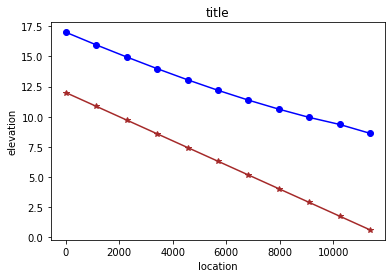

In [116]:
k = 0 # time counter
t = 0.0 # elapsed time
writenow(t,dt,y,v,b0,s) #print the start conditions
for itime in range(0,kmax): # begin time stepping loop scope
#print('Iteration Count = ',itime)
######## Adaptive Time Step Based on Current mesh courant number ###
    bestdt = dt # start with current time step
### begin courant number each cell loop scope
    for i in range(0,nn):
        a = ar(y[i],b0,s);
        b = bt(y[i],b0,s);
        c = math.sqrt(g*a/b);
        dtn = dx/abs((v[i])+c)
    # now test
        if(dtn < bestdt):
            bestdt = dtn
### end courant number each cell loop scope
    dt = bestdt
    #print('adaptive')
    #print('time-step length = ',dt)
    #writenow(t,dt,y,v,b0,s)


###### Finite Difference #################################
    r = 0.5*dt/dx;
###### LEFT BOUNDARY #####################################
# UPSTREAM FIXED STAGE AT PRESCRIBED NORMAL DEPTH        #
##########################################################
    yp[0] = yu
    ab = ar(y[1],b0,s);
    bb = bt(y[1],b0,s);
    cb = math.sqrt(g*bb/ab);
    rb = ab/wp(y[1],b0,s);
    sfb = (mn2*v[1]*v[1])/(rb**(1.333));
    cn = v[1] -cb*y[1]+ g*(s0-sfb)*dt;
    vp[0] = cn + cb*yp[0];
###### RIGHT BOUNDARY ####################################
#         FIXED STAGE AT DOWNSTREAM END                  #
##########################################################
# reflection boundary, find velocity along a characteristic
    yp[n-1] = yd ;
    aa = ar(y[n-1],b0,s);
    ba = bt(y[n-1],b0,s);
    ca = math.sqrt(g*ba/aa);
    ra = aa/wp(y[n-1],b0,s);
    sfa = (mn2*v[n-1]*v[n-1])/(ra**(4.0/3.0));
    cp = v[n-1] + ca*y[n-1]+g*(s0-sfa)*dt;
##yp[nn] <<- (cp - vp[nn])/ca;
    vp[n] = cp - yp[n]*ca 
######## INTERIOR NODES AND REACHES ###############
### loop through the interior nodes
    for i in range(1,n): # begin interior node loop scope
        aa = ar(y[i-1],b0,s);
        ba = bt(y[i-1],b0,s);
        pa = wp(y[i-1],b0,s);
        ra = aa/pa;
        sfa = (mn2*v[i-1]*v[i-1])/(ra**(4.0/3.0));
        ab = ar(y[i+1],b0,s);
        bb = bt(y[i+1],b0,s);
        pb = wp(y[i+1],b0,s);
        rb = ab/pb;
        sfb = (mn2*v[i+1]*v[i+1])/(rb**(4.0/3.0));
# need averages of sf, hydraulic depth
        dm = 0.5*(aa/ba + ab/bb);
        sfm = 0.5*(sfa+sfb);
        vm = 0.5*(v[i-1]+v[i+1]);
        ym = 0.5*(y[i-1]+y[i+1]);
# new momentum
        vp[i] = vm -r*g*(y[i+1] - y[i-1]) -r*vm*(v[i+1] - v[i-1]) + g*dt*(s0-sfm);
# new depth
        yp[i] = ym - r*dm*(v[i+1] - v[i-1]) -r*vm*(y[i+1] - y[i-1]);
### end of interior node loop scope
# update time, count, depth and momentum
    t = t+dt; # Increment simulation time
    k = k+1; # Increment loop counter
    for i in range(0,n):
        v[i]=vp[i]
        y[i]=yp[i]
    if (k%iprt == 0): # Write current conditions every iprt time steps
        writenow(t,dt,y,v,b0,s)
    dt = 2*dt #artificially inflate the time step to force adaptive update
# end time step loop

# provisional code to make a plot - wonder if this could be put into the loop

for i in range(0,nn):
    wse[i]=bse[i]+y[i]
plot2lines(xx,bse,xx,wse,"location","elevation","title")

## References

## References